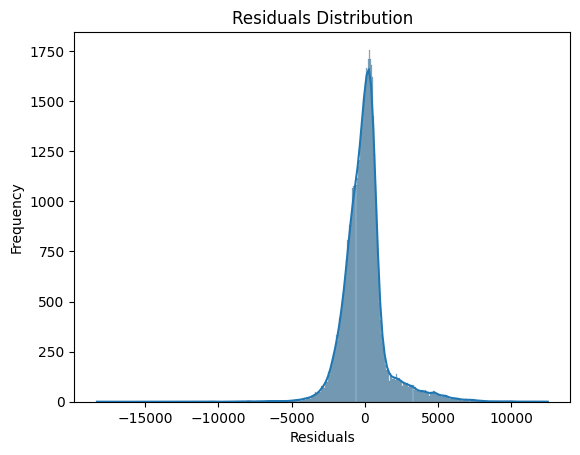

In [28]:
#1.Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table']]
y = df['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid

sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [29]:
 #2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")


MSE: 2328790.80
MAE: 994.33
RMSE: 1526.04


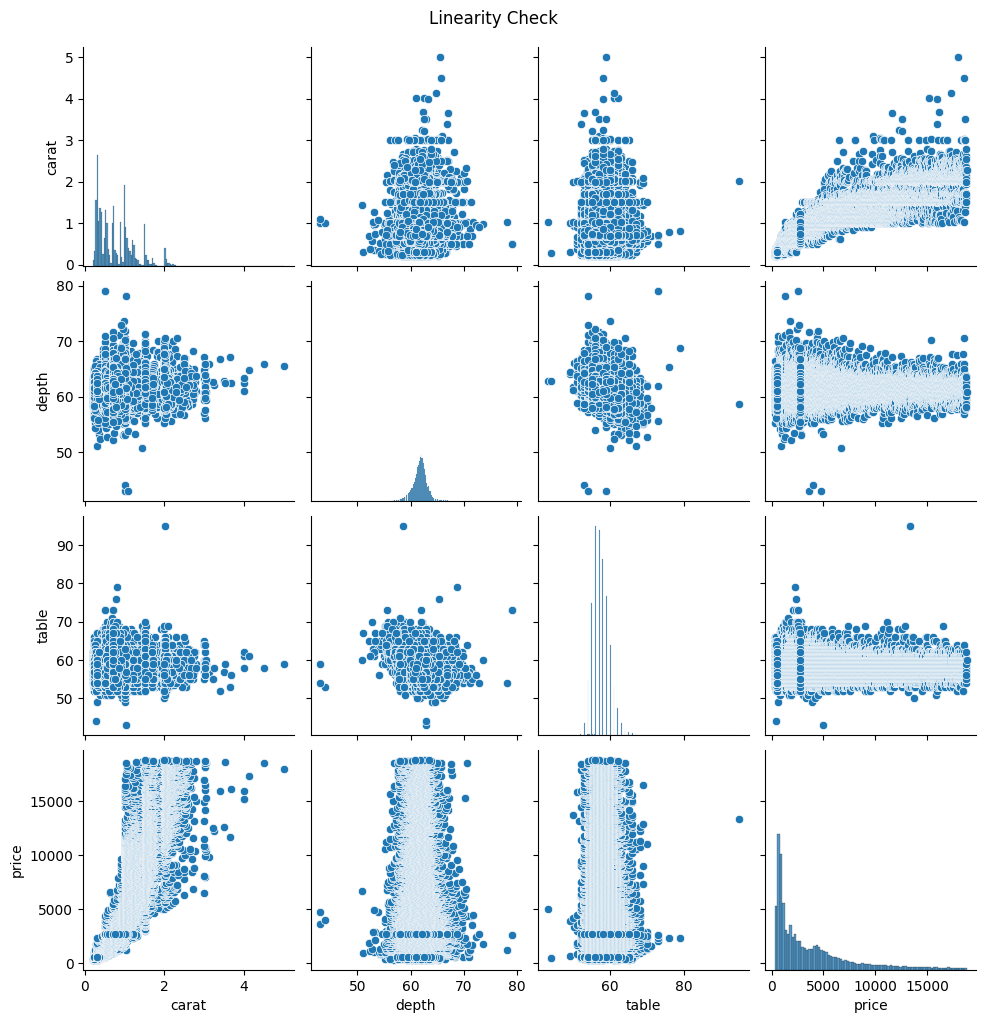

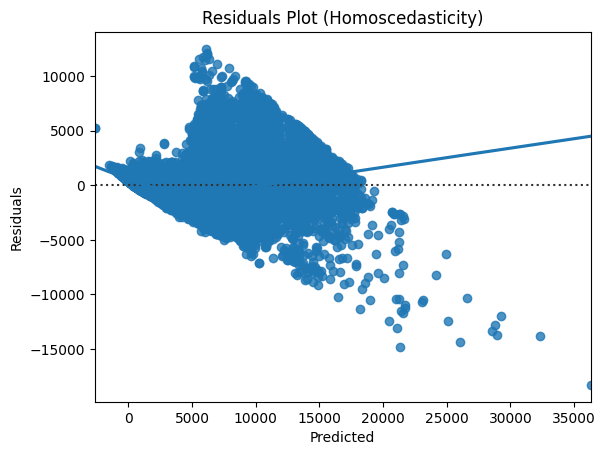

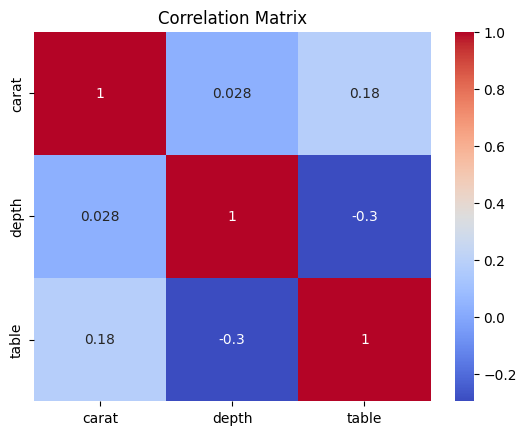

In [30]:
#3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.

import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[['carat', 'depth', 'table', 'price']])
plt.suptitle('Linearity Check', y=1.02)
plt.show()

sns.residplot(x=y_pred, y=residuals, lowess=True)
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Homoscedasticity)")
plt.show()

sns.heatmap(df[['carat', 'depth', 'table']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [31]:
#4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

X = df[['carat', 'depth', 'table']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'RandomForest': RandomForestRegressor()
}

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    pipe.fit(X_train, y_train)
    score = pipe.score(X_test, y_test)
    print(f"{name} R² Score: {score:.4f}")


LinearRegression R² Score: 0.8532
Ridge R² Score: 0.8532
RandomForest R² Score: 0.8716


In [32]:
#5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.
from sklearn.linear_model import LinearRegression

X = df[['carat']]
y = df['price']

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"R² Score: {model.score(X, y):.4f}")


Coefficient: 7756.43
Intercept: -2256.36
R² Score: 0.8493


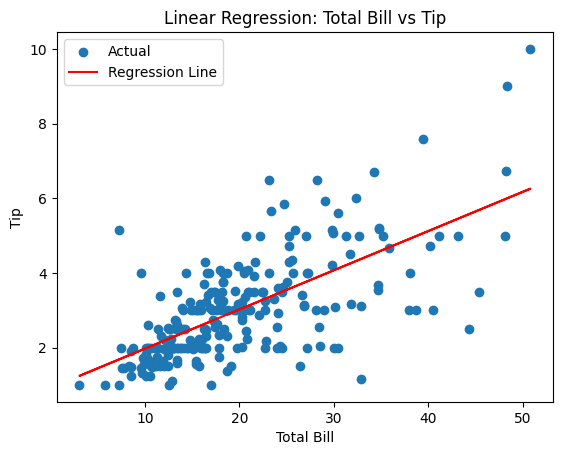

In [33]:
#6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

df = sns.load_dataset('tips')
X = df[['total_bill']]
y = df['tip']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(X, y, label='Actual')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.title('Linear Regression: Total Bill vs Tip')
plt.legend()
plt.show()


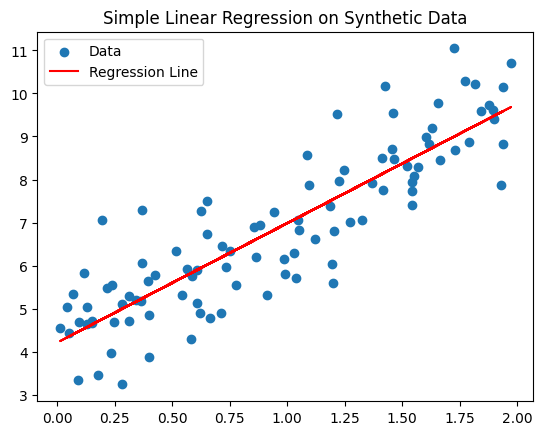

In [34]:
#7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.legend()
plt.title('Simple Linear Regression on Synthetic Data')
plt.show()


In [35]:
#8. Write a Python script that pickles a trained linear regression model and saves it to a file.

import pickle

with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('linear_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

print("Model loaded successfully.")


Model loaded successfully.


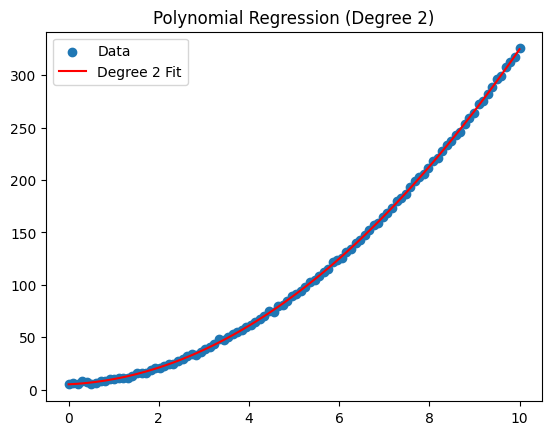

In [36]:
#9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.


from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X = np.linspace(0, 10, 100).reshape(-1, 1)
y = 3 * X**2 + 2 * X + 5 + np.random.randn(100, 1)

poly_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
poly_model.fit(X, y)

y_pred = poly_model.predict(X)
plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Degree 2 Fit')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.show()


In [37]:
#10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

print(f"Coefficient: {model.coef_[0][0]:.2f}")
print(f"Intercept: {model.intercept_[0]:.2f}")


Coefficient: 2.77
Intercept: 4.22


In [38]:
#11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

from sklearn.metrics import r2_score

np.random.seed(0)
X = np.sort(2 * np.random.rand(100, 1), axis=0)
y = 4 + 2 * X + 0.5 * X**2 - X**3 + np.random.randn(100, 1)

degrees = [1, 2, 3, 4, 5]

for d in degrees:
    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"Degree {d} R² Score: {r2:.4f}")


Degree 1 R² Score: 0.1117
Degree 2 R² Score: 0.4736
Degree 3 R² Score: 0.4753
Degree 4 R² Score: 0.4817
Degree 5 R² Score: 0.4825


In [39]:
#12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression

df = sns.load_dataset('diamonds')

print(df.columns)

X = df[['carat', 'depth']]
y = df['price']


model = LinearRegression()
model.fit(X, y)


print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R² Score:", model.score(X, y))

print(sns.get_dataset_names())

df = sns.load_dataset('penguins').dropna()
X = df[['bill_length_mm', 'flipper_length_mm']]
y = df['body_mass_g']



Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')
Coefficients: [7765.14066377 -102.16532216]
Intercept: 4045.3331826016815
R² Score: 0.8506754571636563
['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


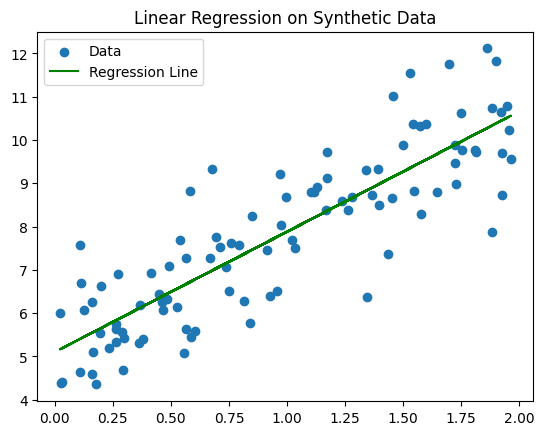

In [40]:
#13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points. Pwskills Java + DSA


X = 2 * np.random.rand(100, 1)
y = 3 * X + 5 + np.random.randn(100, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='green', label='Regression Line')
plt.title('Linear Regression on Synthetic Data')
plt.legend()
plt.show()


In [41]:
#14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features.

import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = sns.load_dataset('diamonds')

X = df[['carat', 'depth', 'table']]

X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

print(df.head())
print(df.columns)



  Feature          VIF
0   const  3539.323665
1   carat     1.042039
2   depth     1.104275
3   table     1.141032
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')


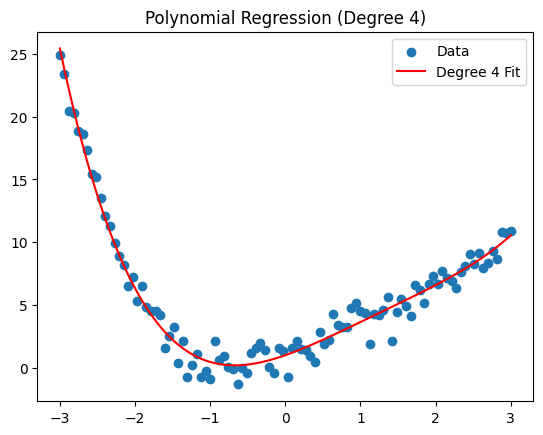

In [42]:
#15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 2 * X + X**2 - 0.5 * X**3 + 0.1 * X**4 + np.random.randn(100, 1)

model = make_pipeline(PolynomialFeatures(4), LinearRegression())
model.fit(X, y)

y_pred = model.predict(X)

plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='red', label='Degree 4 Fit')
plt.legend()
plt.title('Polynomial Regression (Degree 4)')
plt.show()


In [43]:
#16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = df[['carat', 'depth', 'table']]
y = df['price']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X, y)
print(f"R² Score: {pipeline.score(X, y):.4f}")


R² Score: 0.8537


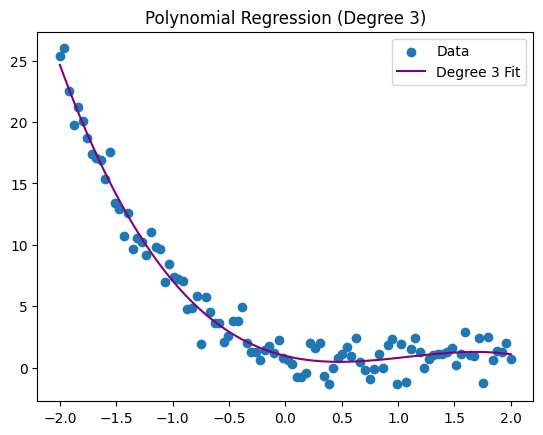

In [44]:
#17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.

X = np.linspace(-2, 2, 100).reshape(-1, 1)
y = 1 - 2 * X + 3 * X**2 - X**3 + np.random.randn(100, 1)

model = make_pipeline(PolynomialFeatures(3), LinearRegression())
model.fit(X, y)
y_pred = model.predict(X)


plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='purple', label='Degree 3 Fit')
plt.title('Polynomial Regression (Degree 3)')
plt.legend()
plt.show()


In [45]:
#18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)
model = LinearRegression()
model.fit(X, y)

print("R² Score:", model.score(X, y))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


R² Score: 0.9955395169111729
Coefficients: [61.83002653 98.93196386 61.31053663 54.99112667 35.59006051]
Intercept: -0.08525293377130971


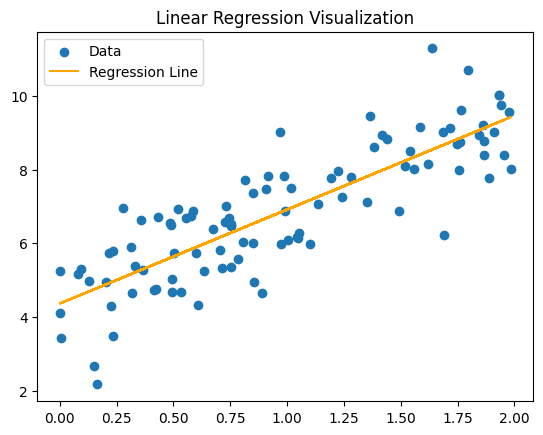

In [46]:
#19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.


X = 2 * np.random.rand(100, 1)
y = 3 * X + 4 + np.random.randn(100, 1)


model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y, label='Data')
plt.plot(X, y_pred, color='orange', label='Regression Line')
plt.legend()
plt.title('Linear Regression Visualization')
plt.show()


In [47]:
#20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

X, y = make_regression(n_samples=100, n_features=3, noise=5, random_state=0)
model = LinearRegression()
model.fit(X, y)

print("R² Score:", model.score(X, y))
print("Coefficients:", model.coef_)


R² Score: 0.9957383940695038
Coefficients: [40.03301286  7.18677034 62.31606419]


In [48]:
#21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

import joblib

joblib.dump(model, 'linear_model_joblib.pkl')


loaded_model = joblib.load('linear_model_joblib.pkl')
print("Model loaded with joblib.")


Model loaded with joblib.


In [49]:
#22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

df = sns.load_dataset('tips')

X = df[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = df['tip']

categorical_features = ['sex', 'smoker', 'day', 'time']
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough'
)


pipeline = make_pipeline(preprocessor, LinearRegression())
pipeline.fit(X, y)

print(f"R² Score: {pipeline.score(X, y):.4f}")


R² Score: 0.4614


In [50]:
#23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

from sklearn.linear_model import Ridge


X, y = make_regression(n_samples=100, n_features=2, noise=15, random_state=1)

lr = LinearRegression()
lr.fit(X, y)


ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

print("Linear Coefficients:", lr.coef_)
print("Ridge Coefficients:", ridge.coef_)
print("Linear R²:", lr.score(X, y))
print("Ridge R²:", ridge.score(X, y))


Linear Coefficients: [30.82964513 82.29350707]
Ridge Coefficients: [30.33735508 81.11810149]
Linear R²: 0.9587240679730559
Ridge R²: 0.9585231775895817


In [51]:
#24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset.

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_samples=100, n_features=3, noise=10, random_state=42)


model = LinearRegression()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-validated R² scores:", scores)
print("Average R²:", scores.mean())


Cross-validated R² scores: [0.98012075 0.9844046  0.98981268 0.98405405 0.97718464]
Average R²: 0.9831153456500197


In [52]:
#25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.


X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 3 * X**2 + 2 * X + np.random.randn(100, 1)

degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree} R² Score: {r2:.4f}")


Degree 1 R² Score: 0.1601
Degree 2 R² Score: 0.9894
Degree 3 R² Score: 0.9895
Degree 4 R² Score: 0.9895
Degree 5 R² Score: 0.9895


Give me the following question answers:

1. What does R-squared represent in a regression model
 - R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1.

2. What are the assumptions of linear regression
 - Linearity

Independence

Homoscedasticity (constant variance)

Normality of residuals

No multicollinearity

3. What is the difference between R-squared and Adjusted R-squared

 - R-squared increases with more features, even if they’re irrelevant.

Adjusted R-squared adjusts for the number of predictors and only increases if the new feature improves the model.

4. Why do we use Mean Squared Error (MSE)
 - MSE measures the average squared difference between actual and predicted values. It penalizes larger errors more than smaller ones.


5. What does an Adjusted R-squared value of 0.85 indicate
 - It means 85% of the variance in the dependent variable is explained by the model, adjusted for the number of predictors used.

6. How do we check for normality of residuals in linear regression
 - Histogram of residuals

Q-Q plot (quantile-quantile plot)

Shapiro-Wilk or Kolmogorov-Smirnov tests

7. What is multicollinearity, and how does it impact regression
 - Multicollinearity occurs when independent variables are highly correlated. It makes coefficient estimates unstable and increases standard errors.


8. What is Mean Absolute Error (MAE)
 - MAE is the average of absolute differences between actual and predicted values. It treats all errors equally.


9. What are the benefits of using an ML pipeline
 - Automates preprocessing

Reduces errors

Makes code cleaner and reusable

Easier to experiment and tune models

10. Why is RMSE considered more interpretable than MSE
 - RMSE has the same units as the target variable, making it easier to understand and compare.


11. What is pickling in Python, and how is it useful in ML
 - Pickling serializes Python objects to save them. In ML, it’s used to save trained models for reuse without retraining.



12. What does a high R-squared value mean
 - It means a large portion of the variance in the target variable is explained by the model. However, it doesn't guarantee the model is good.


13. What happens if linear regression assumptions are violated
 - The model may become biased or inefficient. Predictions and statistical inferences (like p-values) may be unreliable.

14. How can we address multicollinearity in regression
 - Remove or combine correlated variables

Use dimensionality reduction (PCA)

Use regularization (Ridge/Lasso)

15. How can feature selection improve model performance in regression analysis
 - It removes irrelevant or redundant features, which:

Reduces overfitting

Speeds up training

Improves model interpretability

16. How is Adjusted R-squared calculated

Adjusted R^2=1−((1−R^2)(n−1)/ n−p−1)
Where:

n = number of observations

p = number of predictors

17. Why is MSE sensitive to outliers
 - Because it squares the errors, larger errors (outliers) have a disproportionately high impact.

18. What is the role of homoscedasticity in linear regression
 - It means constant variance of residuals across predictions. Without it, standard errors and confidence intervals become unreliable.


19. What is Root Mean Squared Error (RMSE)

 - RMSE is the square root of MSE. It measures the average magnitude of prediction errors in the same unit as the target variable.


20. Why is pickling considered risky
 - Pickled files can execute arbitrary code when loaded. Loading untrusted pickles can lead to security vulnerabilities.


21. What alternatives exist to pickling for saving ML models
 - joblib (efficient for large NumPy arrays)

ONNX (interoperability across frameworks)

TensorFlow SavedModel / PyTorch .pt

PMML or HDF5 (for model portability)


22. What is heteroscedasticity, and why is it a problem
 - Heteroscedasticity means the variance of residuals is not constant. It violates regression assumptions and makes statistical tests unreliable.


23. How can interaction terms enhance a regression model's predictive power?
Pwskills Java + DSA
 - Interaction terms capture combined effects of variables (e.g., how one feature’s effect changes with another), allowing the model to learn more complex relationships.


